

# PEC1: Tipología y fuentes de datos









# Parte 1: Conjunto de datos Titanic

Uno de los dataset más conocidos para entender las bases de la Ciencia de Datos y el Aprendizaje Automático. Contiene información sobre los pasajeros reales a bordo RMS Titanic y se utiliza para predecir si un pasajero sobrevivió o no.

In [ ]:
# importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io



In [ ]:
# subir fichero
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


### 1. Adquisición de datos

El paquete [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) nos sirve para trabajar más cómodamente con conjuntos de datos (datasets). Para empezar, leeremos los datos que están en formato CSV para colocarlos en una estructura de datos denominada [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) que facilita las operaciones.

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
data.head(5)
rows = data.shape[0]
print (rows)

891


In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Descripción de variables

El dataset contiene los datos de pasajeros reales del Titanic. Cada fila representa a una persona. La siguiente es la descripción de las columnas:


| Variable  | Definición  | Comentarios  |
|---|---|---|
|PassengerId | Identificador de pasajero| |
| Survived  | Superviviente  | 0 = No, 1 = Sí  |
| Pclass  | Clase  | 1 = Primera, 2 = Segunda, 3 = Tercera  |
| Name | Nombre | male = hombre, female = mujer  |    
| Sex  | Sexo  |   |
| Age  | Edad en años  | Si es menor a 1 aparece como fracción  |
| SibSp  | Nº de hermanos/esposas a bordo  |   |
| Parch  | Nº de padres/hijos a bordo  |   |
| Ticket  | Nº de ticket  |   |
| Fare  | Precio del billete  |   |
| Cabin | Camarote  |   |
| Embarked  | Puerto de embarque  | C = Cherbourg, Q = Queenstown, S = Southampton  |

In [ ]:
print ('Columnas:')
print(data.columns.values)
print ('Tipos:')
print (data.dtypes)

Columnas:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Tipos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



**Q1 - ¿Cuáles de las variables del conjunto de datos del Titanic son categóricas?**

\# TODO

**Q2 - ¿Alguna de estas variables categóricas es ordinal?** 

\# TODO

**Q3 - ¿Y alguna de estas variables categóricas es binaria?**

\# TODO

**Q4 - ¿Qué tipos de datos utiliza Python para codificar estas variables categóricas?**

\# TODO

**Q5 - Y cuáles son numéricas?**

\# TODO


Si observamos los tipos de las columnas, la columna `Embarked` es de tipo `object`. Es posible cambiar el tipo de datos a uno más adecuado:

In [ ]:
data['Embarked'] = data['Embarked'].astype ("category")
data['Embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

## 3. Filtrado y subconjuntos

En muchas ocasiones necesitamos trabajar con solo parte de un dataset, es decir, un subconjunto. Exiten diferentes formas de hacer esto: usando etiquetas (nombre de columnas), rangos numéricos o especificando la localización por índice.

### 3.1 Selección por etiquetas

En Python se usan los corchetes `[]` para seleccionar un subconjunto de un objeto DataFrame. Por ejemplo, para seleccionar todos los datos de una columna denominada `Age` se usa `data['Age']`:


In [ ]:
ages_df = data['Age'] ## equivalente a data.Age

ages_df.head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

**Q6 - Gestionar el error cuando se selecciona una columna que no existe**

In [ ]:
try:  # TODO
  data['Agge']
except:
    print("Se ha producido un error") 

Se ha producido un error


### 3.2 Selección por rangos

Recordad que Python utiliza la indexación con origen en 0, es decir, que el primer elemento de un array se encuentra en la posición 0 ( y no en el 1).



In [ ]:
print (ages_df[0])

22.0


Mediante el operador `[]` es posible seleccionar conjunto de filas y columnas de un DataFrame. Para seleccionar un conjunto de filas se puede usar `data[inicio:fin]`. Así si queremos selecciona las filas 0, 1 y 2 usaremos el código:

In [ ]:
# seleccionar las filas 0, 1 y 2 (la 3 no será seleccionada)
print (ages_df[0:3])

# seleccionar las filas 4 primeras filas ( 0, 1, 2 y 3 )
print (ages_df[:4])

# seleccionar la última fila
print ( ages_df [-1:])

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64
0    22.0
1    38.0
2    26.0
3    35.0
Name: Age, dtype: float64
890    32.0
Name: Age, dtype: float64


### 3.3 Selección de filas y columnas 

Es posible especificar rangos tanto en filas como en columnas de los DataFrame usando tanto etiquetas como rangos:

+ usando `loc` que se basa en etiquetas

+ usando `iloc` que se basa fundamentalmente en rangos de enteros


In [ ]:
data.loc [ [0, 2, 4], ['Age' , 'Pclass' ,  'Name']]

,Age,Pclass,Name
0,22.0,3,"Braund, Mr. Owen Harris"
2,26.0,3,"Heikkinen, Miss. Laina"
4,35.0,3,"Allen, Mr. William Henry"


In [ ]:
data.iloc [ [ 0, 2, 4 ], [ 4 , 2, 3 ] ]

,Sex,Pclass,Name
0,male,3,"Braund, Mr. Owen Harris"
2,female,3,"Heikkinen, Miss. Laina"
4,male,3,"Allen, Mr. William Henry"


### 3.4 Selección usando parámetros

También es posible seleccionar datos criterios o restricciones. Por ejemplo, es posible seleccionar los nombres de las personas que sobrevivieron al naufragio:

In [ ]:
data.loc [ data.Survived == 1 , ['Name']].head(5)

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Los siguientes son algunos de los operadores disponibles para consultar datos en un DataFrame:

+ Igual: ==
+ Distinto: !=
+ Mayor que o menor que: > o <
+ Mayor o igual: >=
+ Menor o igual: <=

También es posible encadenar varias condiciones con los operadores lógicos:


In [ ]:
data.loc [ (data.Embarked == 'C') & (data.Age <= 12),  ['Name']].head(5)

,Name
43,"Laroche, Miss. Simonne Marie Anne Andree"
125,"Nicola-Yarred, Master. Elias"
381,"Nakid, Miss. Maria (""Mary"")"
448,"Baclini, Miss. Marie Catherine"
469,"Baclini, Miss. Helene Barbara"


### Cuestiones







**Q7 -  Determinar el porcentaje de personas que sobrevivieron**



In [ ]:
def proportion_of_survivors(df):

  passengers = len(df)                       # TODO
  survivors = len(df[data.Survived==True])   # TODO
  nonsurvivors = passengers - survivors        # TODO


  return (survivors/passengers)*100            # TODO

print (proportion_of_survivors (data))


38.38383838383838


**Q8 - Qué género tuvo más oportunidad de sobrevivir**

Calcular el porcentaje de supervivientes entre hombres y mujeres


In [ ]:
def survivors_by_gender (df):

  sbg = { "female": 0.0 ,
          "male": 0.0 }

  survivors_gender = df.groupby('Sex').Survived.mean()  # TODO

  sbg['female'] = survivors_gender[0] # TODO 
  sbg['male'] = survivors_gender[1]   # TODO

  return sbg

print ( survivors_by_gender (data) )

{'female': 0.7420382165605095, 'male': 0.18890814558058924}


**Q9 - Qué clase social tuvo más posibilidades de sobrevivir**


In [ ]:
def survivors_by_class (df):
  sbc = { }

  survivors_class = df.groupby('Pclass').Survived.mean() # TODO

  sbc = survivors_class.to_dict() # TODO
   
  return sbc

print (survivors_by_class (data))

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}


**Q10 - Qué grupo de edad tuvo más posibilidades de sobrevivir**

---



A diferencia de las variables anteriores, la columna `Age` tiene algunos registros sin completar:

In [ ]:
data['Age'].isnull().sum()

177

Para resolver esto, vamos a calcular primero la media de edad del pasaje:

In [ ]:
mean_ages = data['Age'].mean() # TODO
print (mean_ages)

29.69911764705882

Aunque puede que esta media no esté igualmente repartida por género o clase. Vamos a ver la media de edad por género y clase:

In [ ]:
mean_ages_2 = data.groupby(['Sex','Pclass'])['Age'].mean() # TODO
print (mean_ages_2)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


Con la siguiente función se van a sustituir los valores vacíos en la columna `Age` por el promedio de edad según género y clase:

In [ ]:
def replace_nan_age(row):
    if pd.isnull(row['Age']):
        return mean_ages_2 [row['Sex'], row['Pclass']] # TODO 
    else:
        return row['Age']
    
data['Age'] = data.apply(replace_nan_age, axis=1)

Para hacer las edades más fáciles de analizar, es una buena idea agrupar por rangos de edad. Así vamos a añadir una columna más al dataset:

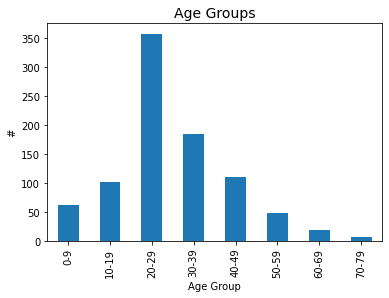

In [ ]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels=age_labels)

data.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Age Groups",fontsize=14)
plt.ylabel('#')
plt.xlabel('Age Group');

Y ahora calcular qué grupo de edad tuvo más probabilidad de sobrevivir al naufragio:

In [ ]:
def survivors_by_age (df):

  sba = {}

  survivors_age = df.groupby(['age_group']).Survived.mean() # TODO
  sba = survivors_age.to_dict() # TODO

  return sba

print (survivors_by_age (data))

{'0-9': 0.6129032258064516, '10-19': 0.4019607843137255, '20-29': 0.31564245810055863, '30-39': 0.4540540540540541, '40-49': 0.35454545454545455, '50-59': 0.4166666666666667, '60-69': 0.3157894736842105, '70-79': 0.0}


Una vez analizados estos tres factores, **cuál consideras que fue el factor más influyente a la hora de sobrevivir al naufragio** .




---

# Parte 2: Metadatos




El [protocolo Open Graph ](https://ogp.me/) es un estándar desarrollado por Facebook que permite que cualquier página web tenga la misma funcionalidad que otro objeto en Facebook, es decir, controla cómo las URLs se visualizan cuando se comparten por redes sociales.



Para hacer esto posible es necesario añadir metadatos en la página, es decir, añadir una serie de tags `<meta>` en la parte `<head>` de la página web.

```
<html prefix="og: https://ogp.me/ns#">
<head>
<title>The Rock (1996)</title>
<meta property="og:title" content="The Rock" />
<meta property="og:type" content="video.movie" />
<meta property="og:url" content="https://www.imdb.com/title/tt0117500/" />
<meta property="og:image" content="https://ia.media-imdb.com/images/rock.jpg" />
...
</head>
...
</html>

```

En esta parte vamos a extraer **metadatos** open graph de una página web, en concreto, de una película de [IMDB](https://www.imdb.com/).

Para ello necesitamos instalar primero un par de librerías que son muy útiles para trabajar en la web: `BeautifulSoup` y `requests`. 

In [ ]:
! pip install requests
! pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

El código a continuación obtiene el código fuente de la página web, tal y como lo hace un navegador, y lo carga en un objeto BeautifulSoup desde el que podemos extraer los metadatos.

In [ ]:
url = 'https://www.imdb.com/title/tt1160419/'
r = requests.get (url=url)

soup = BeautifulSoup (r.text, 'html.parser')

Mediante los métodos `find()`o  `find_all()` es posible extraer los datos de la página.

In [ ]:
soup.find_all ('meta')

[<meta content="width=device-width" name="viewport"/>,
 <meta charset="utf-8"/>,
 <meta content="title" property="imdb:pageType"/>,
 <meta content="main" property="imdb:subPageType"/>,
 <meta content="tt1160419" property="imdb:pageConst"/>,
 <meta content="Dune: Directed by Denis Villeneuve. With Timothée Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with the protection of the most valuable asset and most vital element in the galaxy." data-id="main" name="description"/>,
 <meta content="https://www.imdb.com/title/tt1160419/" property="og:url"/>,
 <meta content="IMDb" property="og:site_name"/>,
 <meta content="Dune (2021) - IMDb" property="og:title"/>,
 <meta content="Dune: Directed by Denis Villeneuve. With Timothée Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with t

In [ ]:
# TODO : obtener todos los tag meta con la propiedad og:title
soup.find ("meta", property="og:title")

<meta content="Dune (2021) - IMDb" property="og:title"/>

In [ ]:
# TODO : obtener la descripción open graph
soup.find ("meta", property="og:description") # TODO

<meta content="Dune: Directed by Denis Villeneuve. With Timothée Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with the protection of the most valuable asset and most vital element in the galaxy." property="og:description"/>

In [ ]:
# TODO : obtener la imagen open graph
soup.find ("meta", property="og:image") # TODO

<meta content="https://m.media-amazon.com/images/M/MV5BN2FjNmEyNWMtYzM0ZS00NjIyLTg5YzYtYThlMGVjNzE1OGViXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_FMjpg_UX1000_.jpg" property="og:image"/>

In [ ]:
import json
from collections import defaultdict
import re


def og_metadata ( soup ):

  metadata = {}

  for md in soup.find_all ("meta", property=re.compile (r'^og:')):
    metadata[ md.get('property', None) ] =  md.get("content", None)  
  
  return metadata


imdb_og_metadata = og_metadata (soup)
print (json.dumps (imdb_og_metadata , indent=2)) # TODO

{
  "og:url": "https://www.imdb.com/title/tt1160419/",
  "og:site_name": "IMDb",
  "og:title": "Dune (2021) - IMDb",
  "og:description": "Dune: Directed by Denis Villeneuve. With Timoth\u00e9e Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with the protection of the most valuable asset and most vital element in the galaxy.",
  "og:type": "video.movie",
  "og:image": "https://m.media-amazon.com/images/M/MV5BN2FjNmEyNWMtYzM0ZS00NjIyLTg5YzYtYThlMGVjNzE1OGViXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_FMjpg_UX1000_.jpg",
  "og:image:height": "1483.3005893909628",
  "og:image:width": "1000"
}


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
display (HTML('<img src="' + imdb_og_metadata['og:image'] + '" width="128" />'))
display (HTML('<h2>' + imdb_og_metadata['og:title'] + '</h2>'))
display (HTML('<p>' + imdb_og_metadata['og:description'] + '</p>'))

---


De la misma manera, [Twitter Cards](https://developer.twitter.com/en/docs/twitter-for-websites/cards/overview/abouts-cards) permite visualizar enlaces a páginas con información más útil que una URL.

Para que Twitter sea capaz de visualizar una URL como una tarjeta (`card`) necesita unos meta tags específicos en la cabecera de la página:



*   `twitter:card` — Tipo de tarjeta.
*   `twitter:title` — Título que se va a visualizar.
*   `twitter:site` — Sitio web.
*   `twitter:description` — Una descripción resumiendo el contenido.
*   `twitter:image`— La URL de la imagen que acompaña la tarjeta.

Sólo `twitter:card` y `twitter:title` son obligatorios.



In [ ]:
soup.find ("meta", property="twitter:card") # TODO: obtener el tipo de tarjeta 

<meta content="summary_large_image" property="twitter:card"/>

Obtener todos los metadatos de Twitter Cards disponibles en el enlace proporcionado y presentarlos como JSON

In [ ]:
def tc_metadata ( soup ):

  metadata = {}

  #for md in soup.find_all ("meta"):
  #  if md.get ("property", None ) is not None:          # TODO
  #    if md.get("property", None).split(':')[0] == 'twitter': 
  #      metadata[ md.get('property', None) ] =  md.get("content", None) 

  for md in soup.find_all ("meta", property=re.compile (r'^twitter:')):
    metadata[ md.get('property', None) ] =  md.get("content", None) 

  return metadata

imdb_tc_metadata = tc_metadata (soup)
print (json.dumps (imdb_tc_metadata , indent=2)) # TODO

{
  "twitter:site": "@IMDb",
  "twitter:title": "Dune (2021) - IMDb",
  "twitter:description": "Dune: Directed by Denis Villeneuve. With Timoth\u00e9e Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with the protection of the most valuable asset and most vital element in the galaxy.",
  "twitter:card": "summary_large_image",
  "twitter:image": "https://m.media-amazon.com/images/M/MV5BN2FjNmEyNWMtYzM0ZS00NjIyLTg5YzYtYThlMGVjNzE1OGViXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_FMjpg_UX1000_.jpg",
  "twitter:image:alt": "Dune: Directed by Denis Villeneuve. With Timoth\u00e9e Chalamet, Rebecca Ferguson, Oscar Isaac, Jason Momoa. Feature adaptation of Frank Herbert's science fiction novel, about the son of a noble family entrusted with the protection of the most valuable asset and most vital element in the galaxy."
}


A continuación podemos visualizar los metadatos obtenidos usando HTML:

In [ ]:
display (HTML('''
   <style>
     .card {
        box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
        transition: 0.3s;
        border-radius: 5px; 
      }
      img {
        border-radius: 5px 5px 0 0;
      }
      .text {
        display: inline-block;
        font-family: "Helvetica Neue", Roboto, "Segoe UI", Calibri, sans-serif;
        font-size: 12px;
        font-weight: bold;
        line-height: 16px;
        border-color: #eee #ddd #bbb;
        border-radius: 5px;
        border-style: solid;
        border-width: 1px;
        box-shadow: 0 1px 3px rgba(0, 0, 0, 0.15);
        margin: 10px 5px;
        padding: 16px 16px 16px 16px;
        max-width: 300px;
      }
      .card:hover {
        box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);
      }
      .container {
        padding: 2px 16px;
      }
   </style>
  <div class="card">
  '''))
display (HTML('<img src="' + imdb_tc_metadata['twitter:image'] + '" width="336" />')) # TODO

display (HTML('<div class="container">'))
display (HTML('<h2>' + imdb_tc_metadata['twitter:title'] + '</h2>'))  # TODO
display (HTML('<scan class="text">' + imdb_tc_metadata['twitter:description'] + '</scan>')) # TODO
display (HTML('</div>'))
display (HTML('</div>'))

# Parte 3: Recuperación de información

Para comprender mejor los conceptos de de Recuperación de Información vamos a comparar un conjunto de documentos y una consulta.

Para ello, vamos a generar 4 documentos v_d$_i$ binarios usando números pseudo-aleatorios, así como un vector de consulta $q$ de la misma forma.

In [ ]:
import numpy as np
np.random.seed(0)

v_d1 = np.random.randint(low=0,high=2,size=100)
v_d2 = np.random.randint(low=0,high=2,size=100)
v_d3 = np.random.randint(low=0,high=2,size=100)
v_d4 = np.random.randint(low=0,high=2,size=100)

documents = [v_d1,v_d2,v_d3,v_d4]

q = np.random.randint(low=0,high=2,size=100)
print (documents[0])

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


Definimos una función que calcule la similitud entre dos vectores utilizando el [producto escalar](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) que contará el máximo número de puntos(palabras) en común.

In [ ]:

def similarity ( doc, query ):
  sim = np.dot ( doc, query ) # TODO
  return sim


print ([ similarity ( doc , q) for doc in documents])



[27, 19, 27, 30]


Esta forma del calcular la similitud tiene un punto débil y es que cuando cuando el tamaño de los documentos crece el número de palabras en común tiendo a crecer también.

La similitud del coseno es una medida que determina cómo de similiares son dos documentos independientemente de su tamaño.

Matemáticamente, el coseno mide el ángulo entre dos vectores y esta es su fórmula:

$cossim(A,B) = \frac{ A \dot B}{ \lVert{A}\rVert \lVert{B}\rVert } $

donde $\lVert{A}\rVert$ es la norma Euclídea, es decir, la longitud del vector y existen [funciones](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) para calcularla. 


La similitud del coseno para vectores de términos mide lo cerca que están dos documentos o un documento y una consulta.



In [ ]:
def cos_similarity ( doc, query ):
  norm_doc = np.linalg.norm(doc) # TODO
  norm_query  = np.linalg.norm(query) # TODO

  return similarity (doc, query) / (norm_doc * norm_query) # TODO

 
print ([ cos_similarity ( doc , q) for doc in documents])




[0.5102520385624568, 0.4005551702879947, 0.5346796732074041, 0.5477225575051661]


Actualmente ya existen implementaciones de estas funciones en los paquetes ([cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). El resultado debería ser el mismo.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity (documents[3].reshape(1,100) , q.reshape (1,100) )


array([[0.54772256]])

---


Cuando se necesita evaluar el rendimiento de un sistema de recuperación de información o de ciencia de datos utilizamos las métricas de la matriz de confusión.

Para ello, vamos a generar dos vectores pseudo-aleatorios: `targets` es de vector de las respuestas correctas y `preds`es el vector de predicciones que nos devuelve el sistema.



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
np.random.seed(1)


targets = np.random.randint(low=0,high=2,size=100)
preds = np.random.randint(low=0,high=2,size=100)

print (preds)

[1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0]


Lo primero es obtener la matriz de confusión:

In [ ]:
print("Confusion Matrix:",confusion_matrix(targets,preds),sep="\n")

Confusion Matrix:
[[24 21]
 [30 25]]


Definimos una función que nos ofrezca el mismo resultado pero calculando nosotros los verdaderos positivos (TP), verdaderos negativos (TN), falsos posistivos (FP) y falsos negativos (FN).

In [ ]:
def myConfusionMatrix ( targets, preds ):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
   
  # TODO
  for y, pred_y in zip(targets,preds):
        if y==1 and pred_y==1:
            TP += 1
        elif y==0 and pred_y==0:
            TN += 1
        elif y==1 and pred_y==0:
            FN += 1
        elif y==0 and pred_y==1:
            FP += 1 

  return np.array([[TN,FP],[FN,TP]])

print("my Confusion Matrix:",myConfusionMatrix (targets,preds),sep="\n")

my Confusion Matrix:
[[24 21]
 [30 25]]


Con la métrica de precisión (precision) podemos medir la calidad del modelo en tareas de clasificación

In [ ]:
from sklearn.metrics import precision_score , recall_score

precision = precision_score(targets,preds)
print("Precision = ", precision)

Precision =  0.5555555555555556


Vamos a definir nuestra función de precisión:

In [ ]:
def myPrecision(targets,preds):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
 
  [[TN,FP],[FN,TP]] = myConfusionMatrix (targets,preds) # TODO
   
  return TP / (TP + FP) # TODO

print("my Precision = ", myPrecision(targets,preds)) 


my Precision =  0.5555555555555556


La métrica de exhaustividad (recall) nos informa sobre la cantidad que el modelo es capaz de identificar.

In [ ]:
recall = recall_score(targets,preds)
print("Recall = ", recall)

Recall =  0.44642857142857145


Vamos a definir nuestra función de exhaustividad:

In [ ]:
def myRecall(targets,preds):
    TP = 0
    FN = 0
    [[TN,FP],[FN,TP]] = myConfusionMatrix (targets,preds) # TODO
            
    return TP / (TP + FN) #TODO

print("My Recall = ",myRecall(targets,preds))

My Recall =  0.44642857142857145


La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado, es decir, la relación entre las predicciones correctas y todas las predicciones.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score (targets, preds)
print ("Accuracy=", accuracy)

Accuracy= 0.49


Vamos a definir nuestra función de exactitud:

In [ ]:
def myAccuracy ( targets, preds):
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  [[TN,FP],[FN,TP]] = myConfusionMatrix (targets,preds) # TODO

  return (TP + TN)/(TP+TN+FP+FN) # TODO


print("My Accuracy = ",myAccuracy(targets,preds))



My Accuracy =  0.49


El valor F1 (F1-score) se utiliza para combinar las medidas de precision y exhaustividad en un sólo valor.

In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(targets,preds)
print("F1_Score = ",f1score)

Vamos a definir nuestra función de valor F1:

In [ ]:
def myF1Score (targets,preds):
  precision = 0
  recall =  0

  # TODO
  precision = myPrecision(targets,preds)
  recall = myRecall (targets, preds )

  return 2 * (precision * recall) / (precision + recall) # TODO

print("my F1_Score = ",myF1Score(targets,preds))

my F1_Score =  0.4950495049504951


Aunque nuestro modelo es muy malo (completamente aleatorio) los resultados de las métricas no dan del todo mal. El problema con estas métricas es que nos lleven a engaño y un modelo parezca mejor de lo que es.